In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import os
import datetime
import warnings
%matplotlib inline

In [3]:
#macro = pd.read_csv('macro_small.csv', header='infer', parse_dates=['timestamp'])
macro = pd.read_csv('macro_small.csv', header='infer')

In [4]:
#clean up dates for macro

macro['year'] = macro['timestamp'].map(lambda x: int(x.split('-')[0]))
macro['month'] = macro['timestamp'].map(lambda x: int(x.split('-')[1]))
macro['day'] = macro['timestamp'].map(lambda x: int(x.split('-')[2]))

macro['date'] = macro.apply(lambda x: datetime.date(x['year'], x['month'], x['day']), axis=1)

In [5]:
macro.corr(method='pearson', min_periods=1)

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,rent_price_4.room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,year,month,day
oil_urals,1.000000,-0.721188,0.826810,-0.935144,-0.890700,-0.842526,0.783870,0.066300,-0.984898,-0.967964,...,-0.510139,-0.586065,-0.535291,0.039896,-0.349284,-0.056474,0.079831,-0.858253,0.000492,0.007549
gdp_quart,-0.721188,1.000000,-0.711272,0.788908,0.775045,0.848557,-0.476176,-0.028098,0.764328,0.769388,...,0.363324,0.608423,0.769495,0.439451,0.674623,0.186274,0.253098,0.848106,0.017664,-0.003477
gdp_quart_growth,0.826810,-0.711272,1.000000,-0.888068,-0.881122,-0.845434,0.600667,0.107339,-0.829126,-0.821164,...,-0.444215,-0.700525,-0.634269,-0.105841,-0.534160,-0.096708,0.042339,-0.860701,-0.044860,0.001131
cpi,-0.935144,0.788908,-0.888068,1.000000,0.978560,0.952849,-0.752882,-0.097589,0.940759,0.930779,...,0.534011,0.655168,0.604043,0.112616,0.460364,0.091767,-0.004113,0.965138,0.019761,-0.009033
ppi,-0.890700,0.775045,-0.881122,0.978560,1.000000,0.934288,-0.704971,-0.130572,0.894056,0.877581,...,0.534013,0.668977,0.625610,0.150126,0.496368,0.113000,0.032382,0.941357,0.107689,-0.007750
gdp_deflator,-0.842526,0.848557,-0.845434,0.952849,0.934288,1.000000,-0.630995,-0.012014,0.862984,0.855238,...,0.485417,0.636431,0.668345,0.241001,0.544268,0.125498,0.050169,0.993258,-0.116788,-0.008711
balance_trade,0.783870,-0.476176,0.600667,-0.752882,-0.704971,-0.630995,1.000000,0.453725,-0.768679,-0.754320,...,-0.320999,-0.263131,-0.249986,0.148260,-0.054541,0.003185,0.158717,-0.632904,-0.208656,0.010601
balance_trade_growth,0.066300,-0.028098,0.107339,-0.097589,-0.130572,-0.012014,0.453725,1.000000,-0.047314,-0.045492,...,0.146774,0.166427,0.133380,0.023853,0.237264,0.130346,0.018464,0.000967,-0.486966,-0.001392
usdrub,-0.984898,0.764328,-0.829126,0.940759,0.894056,0.862984,-0.768679,-0.047314,1.000000,0.991249,...,0.491199,0.581084,0.563609,0.012372,0.378332,0.061403,-0.034882,0.877691,-0.022507,-0.003737
eurrub,-0.967964,0.769388,-0.821164,0.930779,0.877581,0.855238,-0.754320,-0.045492,0.991249,1.000000,...,0.499440,0.569397,0.587503,0.063263,0.395711,0.075306,-0.011268,0.877905,-0.021420,-0.005767


In [6]:
#read in test & training sets
train = pd.read_csv('train_cleaned.csv', header='infer')
test = pd.read_csv('test_cleaned.csv', header='infer')

In [7]:
#clean up dates in training data
train['year'] = train['timestamp'].map(lambda x: int(x.split('-')[0]))
train['month'] = train['timestamp'].map(lambda x: int(x.split('-')[1]))
train['day'] = train['timestamp'].map(lambda x: int(x.split('-')[2]))

train['date'] = train.apply(lambda x: datetime.date(x['year'], x['month'], x['day']), axis=1)

In [8]:
#clean up dates in test data
test['year'] = test['timestamp'].map(lambda x: int(x.split('-')[0]))
test['month'] = test['timestamp'].map(lambda x: int(x.split('-')[1]))
test['day'] = test['timestamp'].map(lambda x: int(x.split('-')[2]))

test['date'] = test.apply(lambda x: datetime.date(x['year'], x['month'], x['day']), axis=1)

In [16]:
train_price = train[['price_doc', 'year', 'month', 'date', 'full_sq']]

train_price.loc[:,'price_per_sq'] = train_price['price_doc']/train_price['full_sq']
train_price.head()

,price_doc,year,month,date,full_sq,price_per_sq
0,5850000,2011,8,2011-08-20,43.0,136046.511628
1,6000000,2011,8,2011-08-23,34.0,176470.588235
2,5700000,2011,8,2011-08-27,43.0,132558.139535
3,13100000,2011,9,2011-09-01,89.0,147191.011236
4,16331452,2011,9,2011-09-05,77.0,212096.779221


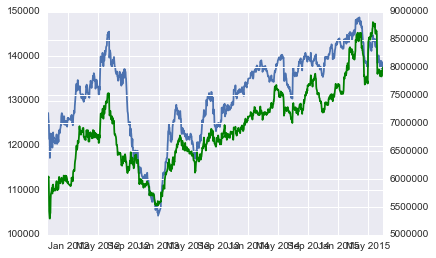

In [10]:
train_price_sq_by_date = train_price.groupby(['date']).agg('mean')[['price_per_sq']]
train_price_by_date = train_price.groupby(['date']).agg('mean')[['price_doc']]
train_price_by_date
train_price_by_date_rolling = train_price_by_date.rolling(window=30).mean()
train_price_sq_by_date_rolling = train_price_sq_by_date.rolling(window=30).mean()

plt.plot(train_price_sq_by_date_rolling.index, train_price_sq_by_date_rolling['price_per_sq'])
ax = plt.gca()
ax2 = ax.twinx()
plt.plot(train_price_by_date_rolling.index, train_price_by_date_rolling['price_doc'], color='g')
plt.xticks(rotation=45)
ax = plt.gca()
plt.show()

In [120]:
train_price_by_date_rolling.reset_index(inplace=True)
train_price_by_date_rolling

,date,price_doc
0,2011-08-20,NaN
1,2011-08-23,NaN
2,2011-08-27,NaN
3,2011-09-01,NaN
4,2011-09-05,NaN
5,2011-09-06,NaN
6,2011-09-08,NaN
7,2011-09-09,NaN
8,2011-09-10,NaN
9,2011-09-13,NaN


In [30]:
macro_small = macro[['cpi', 'usdrub', 'micex', 'mortgage_rate','date', 'month', 'year', 'day', 'timestamp']]
macro_small.head()

,cpi,usdrub,micex,mortgage_rate,date,month,year,day,timestamp
0,345.2,29.5042,1755.95,12.63,2011-02-01,2,2011,1,2011-02-01
1,345.2,29.4570,1765.42,12.63,2011-02-02,2,2011,2,2011-02-02
2,345.2,29.4130,1749.78,12.63,2011-02-03,2,2011,3,2011-02-03
3,345.2,29.4052,1766.53,12.63,2011-02-04,2,2011,4,2011-02-04
4,345.2,29.4052,1766.53,12.63,2011-02-05,2,2011,5,2011-02-05


In [32]:
#merge macro data set with 30 day rolling price data
macro_merged = macro_small.merge(train_price_by_date_rolling, how='left', on='date')

macro_merged.drop(['year', 'month', 'day', 'timestamp'], axis=1, inplace=True)
macro_merged.head(350)

,cpi,usdrub,micex,mortgage_rate,date,price_doc
0,345.2,29.5042,1755.95,12.63,2011-02-01,NaN
1,345.2,29.4570,1765.42,12.63,2011-02-02,NaN
2,345.2,29.4130,1749.78,12.63,2011-02-03,NaN
3,345.2,29.4052,1766.53,12.63,2011-02-04,NaN
4,345.2,29.4052,1766.53,12.63,2011-02-05,NaN
5,345.2,29.4052,1766.53,12.63,2011-02-06,NaN
6,345.2,29.3220,1767.31,12.63,2011-02-07,NaN
7,345.2,29.2380,1729.53,12.63,2011-02-08,NaN
8,345.2,29.2774,1723.32,12.63,2011-02-09,NaN
9,345.2,29.3215,1676.77,12.63,2011-02-10,NaN


In [66]:
#add vol columns!
macro_merged['usdrub_1m_vol'] = macro.usdrub.rolling(window=30).std()

macro_merged['usdrub_3m_vol'] = macro.usdrub.rolling(window=90).std()

In [67]:
#separate out the macro data that is just for test dates
min_test_date = test['date'].min()
max_test_date = test['date'].max()
print min_test_date, max_test_date

#macro_test = macro[(macro['date'] >= min_test_date) & (macro['date'] <= max_test_date)]
macro_test = macro_merged[(macro_merged['date'] >= min_test_date) & (macro_merged['date'] <= max_test_date)]

macro_test.drop(['price_doc'], axis=1, inplace=True)

2015-07-01 2016-05-30


/Users/rachelkogan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [233]:
macro_test.head()
macro_test.to_csv('macro_test.csv', index=False)

In [73]:
macro_start = macro_merged[(macro_merged['date'] < min_test_date)]
macro_start.tail()

,cpi,usdrub,micex,mortgage_rate,date,price_doc,usdrub_3m_vol,usdrub_1m_vol
1606,489.5,54.8064,1644.45,13.46,2015-06-26,7.862176e+06,2.370714,1.181705
1607,489.5,54.8064,1644.45,13.46,2015-06-27,7.943047e+06,2.319600,1.145588
1608,489.5,54.8064,1644.45,13.46,2015-06-28,NaN,2.270075,1.076975
1609,489.5,55.5277,1634.93,13.46,2015-06-29,7.938881e+06,2.215151,1.010612
1610,489.5,55.2655,1654.55,13.46,2015-06-30,7.994729e+06,2.170624,0.920435


In [234]:
min_train_date = train['date'].min()
max_train_date = train['date'].max()

macro_train = macro_merged[(macro_merged['date'] >= min_train_date) & (macro_merged['date'] <= max_train_date)]

macro_train.head()
macro_train.to_csv('macro_train.csv', index=False)

In [185]:
print macro_train.shape
macro_train.dropna(axis=0, how='any', inplace=True)
print macro_train.shape

(1411, 8)
(1132, 8)


/Users/rachelkogan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [71]:
#save as CSVs
macro_test.to_csv('macro_test.csv')
macro_merged.to_csv('macro_merged.csv')

# Macro EDA

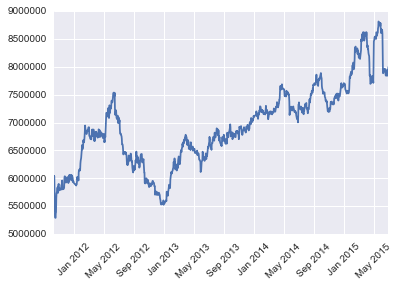

In [49]:
train_price_by_date = train_price.groupby(['date']).agg('mean')[['price_doc']]
train_price_by_date
train_price_by_date_rolling = train_price_by_date.rolling(window=30).mean()

plt.plot(train_price_by_date_rolling.index, train_price_by_date_rolling['price_doc'])
#plt.plot(macro_test_pred_only.date, macro_test_pred_only['macro_test.pred'])

plt.xticks(rotation=45)
ax = plt.gca()
plt.show()

In [134]:
macro.columns

Index([u'timestamp', u'oil_urals', u'gdp_quart', u'gdp_quart_growth', u'cpi',
       u'ppi', u'gdp_deflator', u'balance_trade', u'balance_trade_growth',
       u'usdrub', u'eurrub', u'brent', u'net_capital_export', u'gdp_annual',
       u'gdp_annual_growth', u'average_provision_of_build_contract',
       u'average_provision_of_build_contract_moscow', u'rts', u'micex',
       u'micex_rgbi_tr', u'micex_cbi_tr', u'deposits_value',
       u'deposits_growth', u'mortgage_value', u'mortgage_growth',
       u'mortgage_rate', u'fixed_basket', u'rent_price_4.room_bus',
       u'rent_price_3room_bus', u'rent_price_2room_bus',
       u'rent_price_1room_bus', u'rent_price_3room_eco',
       u'rent_price_2room_eco', u'rent_price_1room_eco', u'year', u'month',
       u'day', u'date'],
      dtype='object')

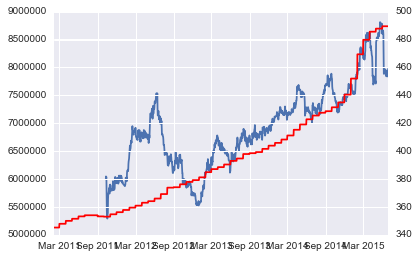

In [75]:
#comparing average price and cpi - training only
train_price_by_date = train_price.groupby(['date']).agg('mean')[['price_doc']]
train_price_by_date
train_price_by_date_rolling = train_price_by_date.rolling(window=30).mean()

plt.plot(train_price_by_date_rolling.index, train_price_by_date_rolling['price_doc'])
#plt.plot(macro_test_pred_only.date, macro_test_pred_only['macro_test.pred'])
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(macro_start.date, macro_start.cpi, color='r')


plt.xticks(rotation=45)
ax = plt.gca()
plt.show()

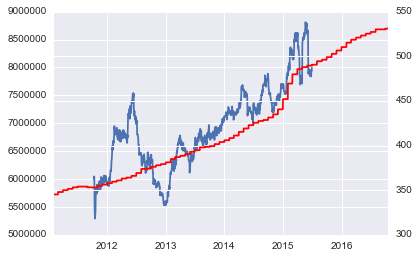

In [53]:
#comparing average price and cpi -- whole time window
train_price_by_date = train_price.groupby(['date']).agg('mean')[['price_doc']]
train_price_by_date
train_price_by_date_rolling = train_price_by_date.rolling(window=30).mean()

plt.plot(train_price_by_date_rolling.index, train_price_by_date_rolling['price_doc'])
#plt.plot(macro_test_pred_only.date, macro_test_pred_only['macro_test.pred'])
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(macro_merged.date, macro_merged.cpi, color='r')


plt.xticks(rotation=45)
ax = plt.gca()
plt.show()

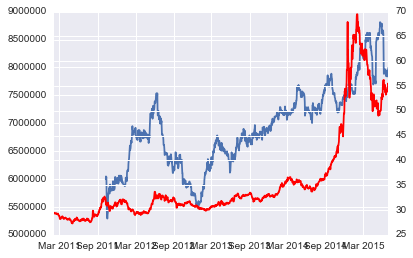

In [76]:
#comparing average price and usdrub -- training only
train_price_by_date = train_price.groupby(['date']).agg('mean')[['price_doc']]
train_price_by_date
train_price_by_date_rolling = train_price_by_date.rolling(window=30).mean()

plt.plot(train_price_by_date_rolling.index, train_price_by_date_rolling['price_doc'])
#plt.plot(macro_test_pred_only.date, macro_test_pred_only['macro_test.pred'])
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(macro_start.date, macro_start.usdrub, color='r')



plt.xticks(rotation=45)
ax = plt.gca()
plt.show()

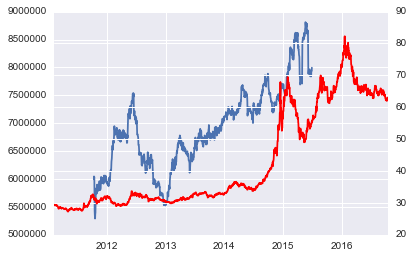

In [56]:
#comparing average price and usdrub -- whole time window
train_price_by_date = train_price.groupby(['date']).agg('mean')[['price_doc']]
train_price_by_date
train_price_by_date_rolling = train_price_by_date.rolling(window=30).mean()

plt.plot(train_price_by_date_rolling.index, train_price_by_date_rolling['price_doc'])
#plt.plot(macro_test_pred_only.date, macro_test_pred_only['macro_test.pred'])
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(macro_merged.date, macro_merged.usdrub, color='r')



plt.xticks(rotation=45)
ax = plt.gca()
plt.show()

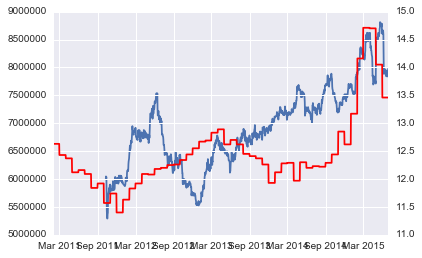

In [58]:
train_price_by_date = train_price.groupby(['date']).agg('mean')[['price_doc']]
train_price_by_date
train_price_by_date_rolling = train_price_by_date.rolling(window=30).mean()

plt.plot(train_price_by_date_rolling.index, train_price_by_date_rolling['price_doc'])
#plt.plot(macro_test_pred_only.date, macro_test_pred_only['macro_test.pred'])
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(macro_train.date, macro_train.mortgage_rate, color='r')


plt.xticks(rotation=45)
ax = plt.gca()
plt.show()

# Add VOL column

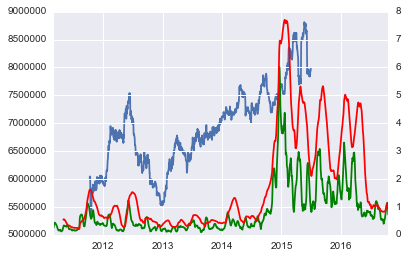

In [71]:
plt.plot(train_price_by_date_rolling.index, train_price_by_date_rolling['price_doc'])
#plt.plot(macro_test_pred_only.date, macro_test_pred_only['macro_test.pred'])
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(macro_merged.date, macro_merged.usdrub_1m_vol, color='g')
ax2.plot(macro_merged.date, macro_merged.usdrub_3m_vol, color='r')

plt.xticks(rotation=45)
ax = plt.gca()
plt.show()

# Linear Regression!!

In [216]:
from scipy import stats
from sklearn import linear_model
ols = linear_model.LinearRegression()

X = macro_train[['mortgage_rate', 'micex', 'cpi', 'usdrub']]
y = np.log(macro_train[['price_doc']]+1)

ols.fit(X, y)

print("beta_1, beta_2, beta_3, beta_4: " + str(np.round(ols.coef_, 3)))

#print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.3f" %ols.intercept_)

print('R^2: %.2f' % ols.score(X, y))

beta_1, beta_2, beta_3, beta_4: [[-0.033 -0.     0.003  0.002]]
beta_0: 15.123
R^2: 0.72


In [221]:
X = macro_train[['cpi']]
y = np.log(macro_train[['price_doc']]+1)

ols.fit(X, y)

print("beta_cpi: " + str(np.round(ols.coef_, 3)))

#print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.2f" %ols.intercept_)

print('R^2: %.2f' % ols.score(X, y))

beta_cpi: [[ 0.002]]
beta_0: 14.80
R^2: 0.70


In [223]:
X = macro_train[['cpi', 'usdrub']]
y = np.log(macro_train[['price_doc']]+1)

ols.fit(X, y)

print("beta_cpi, beta_usdrub: " + str(np.round(ols.coef_, 3)))

#print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.1f" %ols.intercept_)

print('R^2: %.2f' % ols.score(X, y))

beta_cpi, beta_usdrub: [[ 0.002  0.001]]
beta_0: 14.8
R^2: 0.70


In [204]:
print np.corrcoef(macro_train['usdrub'], macro_train['usdrub_1m_vol'])[0][1]
print np.corrcoef(macro_train['usdrub'], macro_train['usdrub_3m_vol'])[0][1]


0.837393698176
0.930689441486


In [225]:
ols_vol = linear_model.LinearRegression()

#X = macro_merged.iloc[89:][['cpi', 'usdrub_3m_vol']]
X = macro_train[['cpi', 'usdrub_3m_vol']]
y = np.log(macro_train[['price_doc']]+1)
ols_vol.fit(X, y)


print("beta_1, beta_2 " + str(np.round(ols_vol.coef_, 3)))

print("beta_0: %.1f" %ols_vol.intercept_)

print('R^2: %.2f' % ols_vol.score(X, y))

beta_1, beta_2 [[ 0.002  0.003]]
beta_0: 14.8
R^2: 0.70


In [227]:
ols_vol = linear_model.LinearRegression()

#X = macro_merged.iloc[89:][['cpi', 'usdrub_3m_vol']]
X = macro_train[['cpi', 'usdrub_3m_vol', 'usdrub']]
y = np.log(macro_train[['price_doc']]+1)
ols_vol.fit(X, y)


print("beta_1, beta_2, beta_3 " + str(np.round(ols_vol.coef_, 4)))

print("beta_0: %.1f" %ols_vol.intercept_)

print('R^2: %.2f' % ols_vol.score(X, y))

beta_1, beta_2, beta_3 [[ 0.0023  0.0044 -0.0003]]
beta_0: 14.8
R^2: 0.70


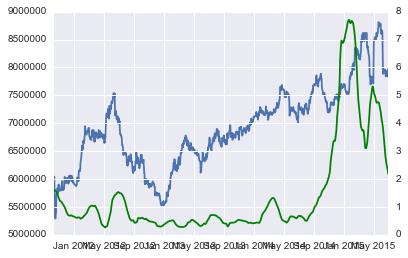

29    2011-11-14
30    2011-11-15
31    2011-11-16
32    2011-11-17
33    2011-11-18
Name: date, dtype: object

In [211]:
X = macro_train[['cpi', 'usdrub_1m_vol', 'date']]
y = macro_train[['price_doc']]
X = X.merge(train_price_by_date_rolling, how='inner', 
            on='date').iloc[29:][['cpi','usdrub_1m_vol', 'date', 'price_doc']]


#plt.plot(y.index, y)

ax = plt.gca()

plt.plot(macro_train['date'], macro_train['price_doc'])
ax2 = ax.twinx()
ax2.plot(macro_train['date'], macro_train['usdrub_3m_vol'], color='g')
#ax2.plot(macro_merged.date, macro_merged.usdrub_3m_vol, color='r')

plt.xticks(rotation=45)
ax = plt.gca()
plt.show()


X['date'].head()

In [110]:
#calculate y predictions and graph

X = macro_merged.iloc[29:][['mortgage_rate', 'micex', 'cpi', 'usdrub']]
y = train_price_by_date_rolling.iloc[29:]['price_doc'].reshape([-1,1])

x_test = X.append(macro_test[['mortgage_rate', 'micex', 'cpi', 'usdrub']])



/Users/rachelkogan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [107]:
#R said that Micex is not significant, so let's elimnate that one.
X = macro_merged.iloc[29:][['cpi', 'usdrub']]
y = train_price_by_date_rolling.iloc[29:]['price_doc'].reshape([-1,1])


ols.fit(X, y)#### What happen if we remove the 'reshape' method? 


print("beta_1, beta_2, beta_3: " + str(np.round(ols.coef_, 3)))

#print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.3f" %ols.intercept_)

print('R^2: %.2f' % ols.score(X, y))

beta_1, beta_2, beta_3: [[ 15157.329   7183.762]]
beta_0: 549682.503
R^2: 0.73


/Users/rachelkogan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


# Calculate Submissions based upon Regression Model

In [253]:
macro_test_reg_pred = pd.read_csv('macro_test_reg_pred.csv')

macro_test_reg_pred.drop('Unnamed: 0', axis=1, inplace=True)
macro_test_reg_pred.tail()

macro_test_reg_pred = macro_test_reg_pred[['date', 'macro_test.pred']]
macro_test_reg_pred.tail()

,date,macro_test.pred
330,2016-05-26,7.411161e+06
331,2016-05-27,7.418113e+06
332,2016-05-28,7.418113e+06
333,2016-05-29,7.418113e+06
334,2016-05-30,7.422283e+06


In [254]:
#clean up dates for macro_test_reg_pred

macro_test_reg_pred['year'] = macro_test_reg_pred['date'].map(lambda x: int(x.split('-')[0]))
macro_test_reg_pred['month'] = macro_test_reg_pred['date'].map(lambda x: int(x.split('-')[1]))
macro_test_reg_pred['day'] = macro_test_reg_pred['date'].map(lambda x: int(x.split('-')[2]))

macro_test_reg_pred['date'] = macro_test_reg_pred.apply(lambda x: datetime.date(x['year'], x['month'], x['day']), axis=1)


In [255]:
macro_test_reg_pred.drop(['year', 'month', 'day'], inplace=True, axis=1)
macro_test_reg_pred.head()

,date,macro_test.pred
0,2015-07-01,7.471647e+06
1,2015-07-02,7.472355e+06
2,2015-07-03,7.467430e+06
3,2015-07-04,7.467430e+06
4,2015-07-05,7.467430e+06


In [256]:
test_pred = test.merge(macro_test_reg_pred, how='left', on='date')
test_pred.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,workplaces_km,young_all,young_female,young_male,zd_vokzaly_avto_km,year,month,day,date,macro_test.pred
0,30474,2015-07-01,39.0,20.7,2,9.0,1.0,1998.0,1.0,8.9,...,7.922610,30808,14557,16251,27.553486,2015,7,1,2015-07-01,7.471647e+06
1,30475,2015-07-01,79.2,NaN,8,17.0,1.0,NaN,3.0,1.0,...,9.672779,574,277,297,27.421853,2015,7,1,2015-07-01,7.471647e+06
2,30476,2015-07-01,40.5,25.1,3,5.0,2.0,1960.0,2.0,4.8,...,3.506298,13799,6862,6937,10.093318,2015,7,1,2015-07-01,7.471647e+06
3,30477,2015-07-01,62.8,36.0,17,17.0,1.0,2016.0,2.0,62.8,...,11.306566,1021,493,529,37.436772,2015,7,1,2015-07-01,7.471647e+06
4,30478,2015-07-01,40.0,40.0,17,17.0,1.0,NaN,1.0,1.0,...,9.479093,574,277,297,25.699461,2015,7,1,2015-07-01,7.471647e+06


In [257]:
print test_pred['macro_test.pred'].isnull().values.any()
print test_pred['macro_test.pred'].isnull().sum()

False
0


In [258]:
#save just the predictions into a csv
test_pred = test_pred[['id', 'macro_test.pred']]
test_pred = test_pred.rename(columns = {'macro_test.pred':'price_doc'})

test_pred.to_csv('test_pred_reg_macro.csv', index=False)
print test_pred.shape

(7662, 2)


# Everything below is a work in progress.

In [57]:
#Import Library
from sklearn.ensemble import RandomForestRegressor
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model= RandomForestRegressor()
X_train = macro_merged.drop(['price_doc'], axis=1)
y_train = macro_merged['price_doc']


dir(model)
# Train the model using the training sets and check score
model.fit(X_train, y_train.reshape([-1, 1]))
#Predict Output
#predicted = model.predict(x_test)

/Users/rachelkogan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


TypeError: float() argument must be a string or a number

In [46]:
print X_train.shape
print y_train.shape
y_train.reshape([-1, 1]).shape

(1132, 34)
(1132,)


/Users/rachelkogan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


(1132, 1)

In [58]:
print type(X_train)
print type(y_train.reshape([-1, 1]))

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


/Users/rachelkogan/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [60]:
macro_merged.tail()

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,fixed_basket,rent_price_4.room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,date,price_doc
1156,61.4105,18209.7,-2.8,489.5,568.9,123.661,16.416,32.9,54.6719,61.2602,...,18720.65,167.37,138.14,72.24,50.93,49.01,38.91,30.29,2015-06-25,7.837148e+06
1157,61.4105,18209.7,-2.8,489.5,568.9,123.661,16.416,32.9,54.8064,61.2079,...,18720.65,167.37,138.14,72.24,50.93,49.01,38.91,30.29,2015-06-26,7.862176e+06
1158,61.4105,18209.7,-2.8,489.5,568.9,123.661,16.416,32.9,54.8064,61.2079,...,18720.65,167.37,138.14,72.24,50.93,49.01,38.91,30.29,2015-06-27,7.943047e+06
1159,61.4105,18209.7,-2.8,489.5,568.9,123.661,16.416,32.9,55.5277,62.2591,...,18720.65,167.37,138.14,72.24,50.93,49.01,38.91,30.29,2015-06-29,7.938881e+06
1160,61.4105,18209.7,-2.8,489.5,568.9,123.661,16.416,32.9,55.2655,61.6334,...,18720.65,167.37,138.14,72.24,50.93,49.01,38.91,30.29,2015-06-30,7.994729e+06


In [62]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,water_km,water_treatment_km,work_all,work_female,work_male,workplaces_km,young_all,young_female,young_male,zd_vokzaly_avto_km
0,30474,2015-07-01,39.0,20.7,2,9.0,1.0,1998.0,1.0,8.9,...,0.248151,0.967696,121369,62231,59138,7.922610,30808,14557,16251,27.553486
1,30475,2015-07-01,79.2,NaN,8,17.0,1.0,NaN,3.0,1.0,...,0.799853,16.049420,2566,1211,1356,9.672779,574,277,297,27.421853
2,30476,2015-07-01,40.5,25.1,3,5.0,2.0,1960.0,2.0,4.8,...,1.384824,11.749900,91795,47061,44734,3.506298,13799,6862,6937,10.093318
3,30477,2015-07-01,62.8,36.0,17,17.0,1.0,2016.0,2.0,62.8,...,0.233017,5.061917,4568,2155,2414,11.306566,1021,493,529,37.436772
4,30478,2015-07-01,40.0,40.0,17,17.0,1.0,NaN,1.0,1.0,...,0.394422,16.784630,2566,1211,1356,9.479093,574,277,297,25.699461
